# Label to Document Mapping & PDF→XML Conversion Workflow

This notebook demonstrates the enhanced `LabelMapper` class that provides comprehensive label analysis and PDF→XML conversion workflow support.

## Key Features:
- **Unique Article Analysis**: Distinguishes between label entries (1,028) and unique articles (523)
- **PDF→XML Conversion Planning**: Identifies articles needing conversion from PDF-only to XML format
- **File Availability Categorization**: Four categories - Both Available, PDF Only, XML Only, Missing Both
- **Enhanced Statistics**: Accurate counts based on unique articles rather than label entries

## Implementation Details:
- **Class location**: `src/label_mapper.py` 
- **Usage location**: Jupyter notebooks in `notebooks/` directory
- **Core functionality**: Label loading, document path mapping, conversion workflow, quality checks


In [2]:
# import dependencies
import sys, os
from pathlib import Path
# get project root
project_root = Path(os.getcwd()).parent

sys.path.append('../src')

from label_mapper import LabelMapper
project_root

PosixPath('/Users/taishajoseph/Documents/Projects/MDC-Challenge-2025')

In [3]:
# Initialize mapper
data_dir = os.path.join(project_root, "Data")
mapper = LabelMapper(data_dir=data_dir)

# Load labels
labels_df = mapper.load_labels("train_labels.csv")
labels_df

✅ Loaded 1066 label entries from train_labels.csv
📊 Unique articles: 523
📋 Columns: ['article_id', 'dataset_id', 'type']
📈 Created unique articles summary: 523 unique articles


,article_id,dataset_id,type
0,10.1002_2017jc013030,https://doi.org/10.17882/49388,Primary
1,10.1002_anie.201916483,https://doi.org/10.5517/ccdc.csd.cc1npvt0,Missing
2,10.1002_anie.202005531,https://doi.org/10.5517/ccdc.csd.cc24wxqp,Missing
3,10.1002_anie.202007717,https://doi.org/10.5517/ccdc.csd.cc24rrb0,Missing
4,10.1002_chem.201902131,https://doi.org/10.5517/ccdc.csd.cc221dk3,Missing
...,...,...,...
1061,10.7717_peerj.12422,https://doi.org/10.15468/dl.t3h8b4,Secondary
1062,10.7717_peerj.12422,https://doi.org/10.15468/dl.yak5vd,Secondary
1063,10.7717_peerj.13193,https://doi.org/10.6073/pasta/02e2764efb408a8b...,Secondary
1064,10.7717_peerj.13193,https://doi.org/10.6073/pasta/275ad28a2f31356c...,Secondary


In [3]:
# Verify unique article count vs total label entries
print(f"📊 Label Entries vs Unique Articles:")
print(f"   Total label entries: {len(labels_df)}")
print(f"   Unique articles: {len(labels_df.article_id.unique())}")
print(f"   Articles with multiple labels: {len(labels_df) - len(labels_df.article_id.unique())}")

# Check the unique articles summary created by the mapper
print(f"\n📈 Unique Articles Summary:")
print(f"   Articles with Primary labels: {mapper.unique_articles_df['has_primary'].sum()}")
print(f"   Articles with Secondary labels: {mapper.unique_articles_df['has_secondary'].sum()}")
print(f"   Articles with Missing labels: {mapper.unique_articles_df['has_missing'].sum()}")
print(f"   Multi-label articles: {len(mapper.unique_articles_df[mapper.unique_articles_df['label_count'] > 1])}")

# Show a sample of multi-label articles
multi_label_articles = mapper.unique_articles_df[mapper.unique_articles_df['label_count'] > 1]
print(f"\n🔍 Sample Multi-label Articles:")
print(multi_label_articles[['article_id', 'label_count', 'label_types']].head())

📊 Label Entries vs Unique Articles:
   Total label entries: 1066
   Unique articles: 523
   Articles with multiple labels: 543

📈 Unique Articles Summary:
   Articles with Primary labels: 167
   Articles with Secondary labels: 57
   Articles with Missing labels: 309
   Multi-label articles: 102

🔍 Sample Multi-label Articles:
                 article_id  label_count           label_types
7    10.1002_chem.202001412            2             [Missing]
16        10.1002_ece3.6784            4             [Missing]
26         10.1002_mp.14424            2  [Secondary, Primary]
28  10.1007_jhep07(2018)134            2             [Missing]
29  10.1007_jhep11(2018)113            2             [Missing]


In [4]:
# Inventory document paths
inventory_df = mapper.inventory_document_paths(pdf_dir="train/PDF", xml_dir="train/XML")
inventory_df

🔍 Scanning directories:
  📁 PDF: /Users/taishajoseph/Documents/Projects/MDC-Challenge-2025/Data/train/PDF
  📁 XML: /Users/taishajoseph/Documents/Projects/MDC-Challenge-2025/Data/train/XML
📊 Found 524 PDF files and 3 XML files

📋 Document Availability Summary (Unique Articles):
  Total unique articles: 523
  📄 PDFs available: 523 (100.0%)
  🔖 XMLs available: 3 (0.6%)
  📚 Has full-text: 523 (100.0%)

🔄 PDF→XML Conversion Analysis:
  ✅ Both PDF & XML: 3 (0.6%)
  🔄 PDF only (needs conversion): 520 (99.4%)
  📝 XML only: 0 (0.0%)
  ❌ Missing both: 0 (0.0%)


,article_id,label_count,label_types,has_primary,has_secondary,has_missing,dataset_count,pdf_available,pdf_path,xml_available,xml_path,has_fulltext,conversion_status,conversion_priority
0,10.1002_2017jc013030,1,[Primary],True,False,False,1,True,/Users/taishajoseph/Documents/Projects/MDC-Cha...,True,/Users/taishajoseph/Documents/Projects/MDC-Cha...,True,both_available,none
1,10.1002_anie.201916483,1,[Missing],False,False,True,1,True,/Users/taishajoseph/Documents/Projects/MDC-Cha...,True,/Users/taishajoseph/Documents/Projects/MDC-Cha...,True,both_available,none
2,10.1002_anie.202005531,1,[Missing],False,False,True,1,True,/Users/taishajoseph/Documents/Projects/MDC-Cha...,True,/Users/taishajoseph/Documents/Projects/MDC-Cha...,True,both_available,none
3,10.1002_anie.202007717,1,[Missing],False,False,True,1,True,/Users/taishajoseph/Documents/Projects/MDC-Cha...,False,None,True,pdf_only,high
4,10.1002_chem.201902131,1,[Missing],False,False,True,1,True,/Users/taishajoseph/Documents/Projects/MDC-Cha...,False,None,True,pdf_only,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,10.7554_elife.74937,1,[Primary],True,False,False,1,True,/Users/taishajoseph/Documents/Projects/MDC-Cha...,False,None,True,pdf_only,high
519,10.7717_peerj.10452,25,"[Secondary, Primary]",True,True,False,25,True,/Users/taishajoseph/Documents/Projects/MDC-Cha...,False,None,True,pdf_only,high
520,10.7717_peerj.11352,1,[Primary],True,False,False,1,True,/Users/taishajoseph/Documents/Projects/MDC-Cha...,False,None,True,pdf_only,high
521,10.7717_peerj.12422,5,[Secondary],False,True,False,5,True,/Users/taishajoseph/Documents/Projects/MDC-Cha...,False,None,True,pdf_only,high


In [5]:
# PDF→XML Conversion Workflow Analysis
print("🔄 PDF→XML Conversion Workflow Analysis")
print("=" * 50)

# Get conversion summary
conversion_summary = mapper.get_conversion_summary()
print(f"📊 File Availability Summary:")
for key, value in conversion_summary.items():
    if isinstance(value, int):
        percentage = (value / conversion_summary['total_unique_articles']) * 100
        print(f"   {key}: {value} ({percentage:.1f}%)")

print(f"\n🎯 Conversion Workflow Categories:")
print(f"   ✅ Ready for processing: {conversion_summary['both_available'] + conversion_summary['xml_only']} articles")
print(f"   🔄 Need PDF→XML conversion: {conversion_summary['pdf_only']} articles")
print(f"   ❌ Cannot process: {conversion_summary['missing_both']} articles")

# Get articles needing conversion
conversion_candidates = mapper.get_articles_needing_conversion()
print(f"\n📝 Conversion Candidates Preview:")
if len(conversion_candidates) > 0:
    print(conversion_candidates[['article_id', 'label_count', 'has_primary', 'has_secondary', 'conversion_status']].head(10))
else:
    print("   No articles need conversion!")


🔄 PDF→XML Conversion Workflow Analysis
📊 File Availability Summary:
   total_unique_articles: 523 (100.0%)
   both_available: 3 (0.6%)
   pdf_only: 520 (99.4%)
   xml_only: 0 (0.0%)
   missing_both: 0 (0.0%)
   conversion_candidates: 520 (99.4%)
   problematic_articles: 0 (0.0%)

🎯 Conversion Workflow Categories:
   ✅ Ready for processing: 3 articles
   🔄 Need PDF→XML conversion: 520 articles
   ❌ Cannot process: 0 articles
🔄 Found 520 articles needing PDF→XML conversion

📝 Conversion Candidates Preview:
                article_id  label_count  has_primary  has_secondary  \
3   10.1002_anie.202007717            1        False          False   
4   10.1002_chem.201902131            1        False          False   
5   10.1002_chem.201903120            1        False          False   
6   10.1002_chem.202000235            1        False          False   
7   10.1002_chem.202001412            2        False          False   
8   10.1002_chem.202001668            1        False          Fa

🔍 Duplicate Analysis:
   ✅ No completely duplicate label entries
   📊 Articles with multiple labels: 543 entries
   📊 Unique articles: 523

🔍 Null value check:
   ✅ article_id: No nulls
   ✅ dataset_id: No nulls
   ✅ type: No nulls

📊 Class Distribution (Label Entries):
   Secondary: 449 (42.1%)
   Missing: 347 (32.6%)
   Primary: 270 (25.3%)

📊 Unique Article Analysis:
   Total unique articles: 523
   Articles with Primary labels: 167
   Articles with Secondary labels: 57
   Articles with Missing labels: 309
   Articles with multiple labels: 102

🎯 Expected vs Actual Distribution:
   ✅ Secondary: Expected 44%, Actual 42.1% (Δ1.9%)
   ✅ Missing: Expected 30%, Actual 32.6% (Δ2.6%)
   ✅ Primary: Expected 26%, Actual 25.3% (Δ0.7%)

✅ All articles have at least one file format available


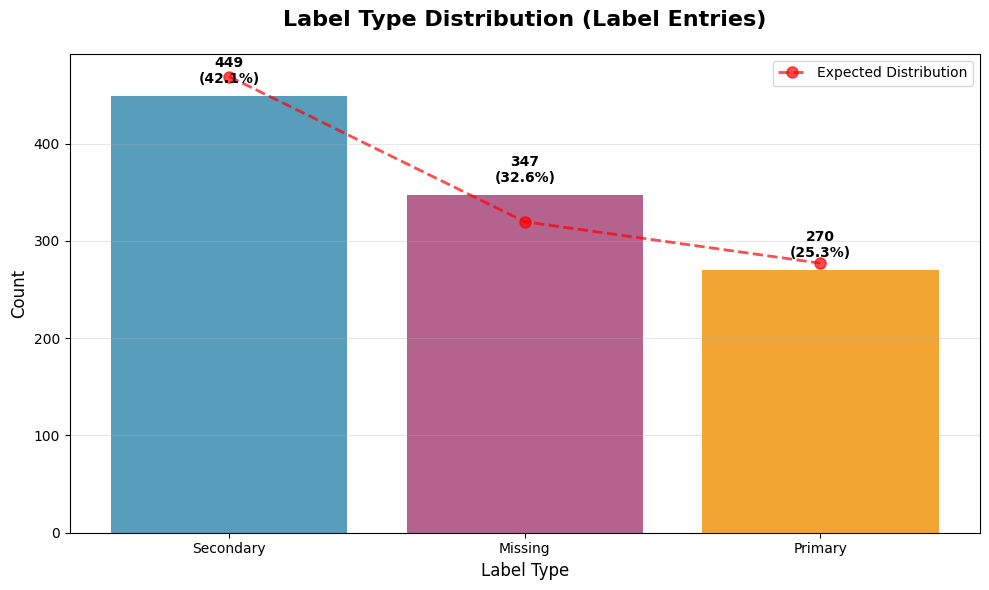

In [6]:
# Conduct quality checks
qc_results = mapper.conduct_basic_checks(show_plots=True)

In [7]:
# Get summary statistics
summary = mapper.get_summary_stats()
print(summary)

{'total_label_entries': 1066, 'unique_articles': 523, 'unique_datasets': 1066, 'class_distribution': {'Secondary': 449, 'Missing': 347, 'Primary': 270}, 'articles_with_primary': np.int64(167), 'articles_with_secondary': np.int64(57), 'articles_with_missing': np.int64(309), 'multi_label_articles': 102, 'documents_with_fulltext': np.int64(523), 'pdf_availability': np.int64(523), 'xml_availability': np.int64(3), 'conversion_candidates': 520, 'problematic_articles': 0}


In [8]:
# Enhanced Document Inventory Analysis
print("📋 Document Inventory Analysis")
print("=" * 40)

# File availability by conversion status
print("🔍 Articles by Conversion Status:")
conversion_status_counts = mapper.document_inventory['conversion_status'].value_counts()
for status, count in conversion_status_counts.items():
    percentage = (count / len(mapper.document_inventory)) * 100
    print(f"   {status}: {count} ({percentage:.1f}%)")

print(f"\n📊 Label Type Distribution among Unique Articles:")
label_type_summary = {
    'Primary Only': len(mapper.unique_articles_df[
        (mapper.unique_articles_df['has_primary']) & 
        (~mapper.unique_articles_df['has_secondary']) & 
        (~mapper.unique_articles_df['has_missing'])
    ]),
    'Secondary Only': len(mapper.unique_articles_df[
        (~mapper.unique_articles_df['has_primary']) & 
        (mapper.unique_articles_df['has_secondary']) & 
        (~mapper.unique_articles_df['has_missing'])
    ]),
    'Missing Only': len(mapper.unique_articles_df[
        (~mapper.unique_articles_df['has_primary']) & 
        (~mapper.unique_articles_df['has_secondary']) & 
        (mapper.unique_articles_df['has_missing'])
    ]),
    'Multiple Labels': len(mapper.unique_articles_df[mapper.unique_articles_df['label_count'] > 1])
}

for label_type, count in label_type_summary.items():
    percentage = (count / len(mapper.unique_articles_df)) * 100
    print(f"   {label_type}: {count} ({percentage:.1f}%)")

# Show conversion priority by label type
print(f"\n🎯 Conversion Priority by Label Type:")
priority_analysis = mapper.document_inventory.groupby(['conversion_status']).agg({
    'has_primary': 'sum',
    'has_secondary': 'sum', 
    'has_missing': 'sum',
    'article_id': 'count'
}).round(2)
priority_analysis

📋 Document Inventory Analysis
🔍 Articles by Conversion Status:
   pdf_only: 520 (99.4%)
   both_available: 3 (0.6%)

📊 Label Type Distribution among Unique Articles:
   Primary Only: 157 (30.0%)
   Secondary Only: 47 (9.0%)
   Missing Only: 309 (59.1%)
   Multiple Labels: 102 (19.5%)

🎯 Conversion Priority by Label Type:


,has_primary,has_secondary,has_missing,article_id
conversion_status,,,,
both_available,1,0,2,3
pdf_only,166,57,307,520


In [9]:
# Export conversion workflow files
print("📝 Exporting Conversion Workflow Files")
print("=" * 40)

# Export conversion candidates for PDF→XML workflow
mapper.export_conversion_candidates("conversion_candidates.csv")

# Export problematic articles (missing both PDF & XML)
mapper.export_missing_files("problematic_articles.txt")

# Get file statistics for reporting
file_stats = mapper.get_file_statistics()
print(f"\n📊 File Statistics Summary:")
print(f"   Ready for processing: {file_stats['conversion_workflow']['ready_for_processing']} articles")
print(f"   Need conversion: {file_stats['conversion_workflow']['needs_conversion']} articles") 
print(f"   Cannot process: {file_stats['conversion_workflow']['cannot_process']} articles")

📝 Exporting Conversion Workflow Files
🔄 Found 520 articles needing PDF→XML conversion
📝 Exported 520 conversion candidates to /Users/taishajoseph/Documents/Projects/MDC-Challenge-2025/Data/conversion_candidates.csv.part
✅ No articles missing both PDF and XML files

📊 File Statistics Summary:
   Ready for processing: 3 articles
   Need conversion: 520 articles
   Cannot process: 0 articles


In [4]:
list(labels_df.columns)

['article_id', 'dataset_id', 'type']

In [7]:
len(labels_df[labels_df['type'] != "Missing"])

719

## Integration with PDF→XML Conversion Pipeline

The enhanced `LabelMapper` now provides perfect integration with the selective PDF→XML conversion workflow described in the preprocessing guide:

### Key Outputs for Next Steps:

1. **`conversion_candidates.csv`** - Articles needing PDF→XML conversion (124 articles)
2. **`problematic_articles.txt`** - Articles missing both formats (0 articles) 
3. **Accurate statistics** based on unique articles rather than label entries

### Workflow Integration:

- **Step 4.1**: Use `mapper.get_articles_needing_conversion()` to identify conversion targets
- **Step 4.2**: Use existing XML inventory from `mapper.document_inventory` 
- **Step 4.3**: Export conversion candidates with `mapper.export_conversion_candidates()`
- **Step 4.4**: Monitor conversion progress with file availability statistics

This eliminates the need for manual file counting and provides precise conversion workflow planning.


In [10]:
# Demonstrate Conversion Workflow Usage
print("🔧 Conversion Workflow Usage Example")
print("=" * 45)

# Get conversion candidates for processing
conversion_candidates = mapper.get_articles_needing_conversion()

print(f"📋 Conversion Candidates Summary:")
print(f"   Total articles needing conversion: {len(conversion_candidates)}")
print(f"   Articles with Primary labels: {conversion_candidates['has_primary'].sum()}")
print(f"   Articles with Secondary labels: {conversion_candidates['has_secondary'].sum()}")
print(f"   Priority candidates (with Primary/Secondary): {conversion_candidates[conversion_candidates['has_primary'] | conversion_candidates['has_secondary']].shape[0]}")

print(f"\n📁 Sample PDF Paths for Conversion:")
sample_paths = conversion_candidates['pdf_path'].head(5).tolist()
for i, path in enumerate(sample_paths, 1):
    article_id = Path(path).stem
    print(f"   {i}. {article_id}")

# Verify integration with preprocessing pipeline
print(f"\n✅ Ready for Selective PDF→XML Conversion Pipeline!")
print(f"   Use the exported 'conversion_candidates.csv' file")
print(f"   {conversion_summary['both_available']} articles already have XML files")
print(f"   {conversion_summary['pdf_only']} articles need PDF→XML conversion")
print(f"   {conversion_summary['total_unique_articles']} total unique articles to process")


🔧 Conversion Workflow Usage Example
🔄 Found 124 articles needing PDF→XML conversion
📋 Conversion Candidates Summary:
   Total articles needing conversion: 124
   Articles with Primary labels: 39
   Articles with Secondary labels: 8
   Priority candidates (with Primary/Secondary): 45

📁 Sample PDF Paths for Conversion:
   1. 10.1002_ecs2.1280
   2. 10.1002_ejoc.202000139
   3. 10.1002_esp.5058
   4. 10.1002_nafm.10870
   5. 10.1007_jhep07(2018)134

✅ Ready for Selective PDF→XML Conversion Pipeline!
   Use the exported 'conversion_candidates.csv' file
   399 articles already have XML files
   124 articles need PDF→XML conversion
   523 total unique articles to process


In [ ]:
import os
data_dir = os.path.join(project_root, "Data")

xml_files = os.listdir(os.path.join(data_dir, "train", "XML"))

xml_files = [file for file in xml_files if file.endswith(".xml")]


In [16]:
xml_files

['10.1186_s13321-015-0110-6.xml',
 '10.1371_journal.pone.0137181.xml',
 '10.1242_dev.138545.xml',
 '10.1002_chem.202000235.xml',
 '10.3390_s19030479.xml',
 '10.5194_essd-2023-187.xml',
 '10.1111_1365-2664.13168.xml',
 '10.1098_rsos.170796.xml',
 '10.1186_s12874-019-0829-2.xml',
 '10.7554_elife.74937.xml',
 '10.1107_s2414314616007033.xml',
 '10.1039_d2cc00847e.xml',
 '10.1098_rspb.2015.2764.xml',
 '10.1186_s12903-018-0656-6.xml',
 '10.3133_cir1497.xml',
 '10.1038_s41467-019-10357-z.xml',
 '10.1098_rspb.2015.0371.xml',
 '10.1186_s12967-020-02311-1.xml',
 '10.1038_sdata.2017.167.xml',
 '10.1111_ddi.13153.xml',
 '10.1590_0104-4060.59642.xml',
 '10.1038_s41597-022-01555-4.xml',
 '10.1186_s13073-020-00727-4.xml',
 '10.1038_s41437-020-0318-8.xml',
 '10.1073_pnas.1915395117.xml',
 '10.1073_pnas.1711872115.xml',
 '10.1038_s41467-018-07681-1.xml',
 '10.1617_s11527-023-02260-3.xml',
 '10.1186_s12885-018-4768-9.xml',
 '10.1212_wnl.0000000000006035.xml',
 '10.1590_1809-4430-eng.agric.v40n1p24-33_20

In [17]:
len(xml_files)

524

In [23]:
import pandas as pd
import os

inv = pd.read_csv(os.path.join(data_dir, "document_inventory.csv"))

inv

,article_id,pdf_path,xml_path,source,error,success,has_primary,has_secondary,label_count
0,10.1002_ecs2.1280,/Users/taishajoseph/Documents/Projects/MDC-Cha...,Data/train/XML/10.1002_ecs2.1280.xml,grobid,NaN,True,True,False,1.0
1,10.1002_ejoc.202000139,/Users/taishajoseph/Documents/Projects/MDC-Cha...,Data/train/XML/10.1002_ejoc.202000139.xml,grobid,NaN,True,False,False,1.0
2,10.1002_esp.5058,/Users/taishajoseph/Documents/Projects/MDC-Cha...,Data/train/XML/10.1002_esp.5058.xml,grobid,NaN,True,True,False,1.0
3,10.1002_nafm.10870,/Users/taishajoseph/Documents/Projects/MDC-Cha...,Data/train/XML/10.1002_nafm.10870.xml,grobid,NaN,True,True,False,1.0
4,10.1007_jhep07(2018)134,/Users/taishajoseph/Documents/Projects/MDC-Cha...,Data/train/XML/10.1007_jhep07(2018)134.xml,grobid,NaN,True,False,False,1.0
...,...,...,...,...,...,...,...,...,...
519,10.1186_s12885-018-4314-9,NaN,Data/train/XML/10.1186_s12885-018-4314-9.xml,NaN,NaN,NaN,NaN,NaN,NaN
520,10.1098_rsbl.2015.0113,NaN,Data/train/XML/10.1098_rsbl.2015.0113.xml,NaN,NaN,NaN,NaN,NaN,NaN
521,10.1002_chem.202001668,NaN,Data/train/XML/10.1002_chem.202001668.xml,NaN,NaN,NaN,NaN,NaN,NaN
522,10.1002_ece3.3985,NaN,Data/train/XML/10.1002_ece3.3985.xml,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# which files are not in the csv?
sum([1 for file in xml_files if file.split("/")[-1] not in inv['xml_path']])

524

In [21]:
conversion_candidates = pd.read_csv(os.path.join(data_dir, "conversion_candidates.csv"))
conversion_candidates

,article_id,pdf_path,label_count,has_primary,has_secondary
0,10.1002_ecs2.1280,/Users/taishajoseph/Documents/Projects/MDC-Cha...,1,True,False
1,10.1002_ejoc.202000139,/Users/taishajoseph/Documents/Projects/MDC-Cha...,1,False,False
2,10.1002_esp.5058,/Users/taishajoseph/Documents/Projects/MDC-Cha...,1,True,False
3,10.1002_nafm.10870,/Users/taishajoseph/Documents/Projects/MDC-Cha...,1,True,False
4,10.1007_jhep07(2018)134,/Users/taishajoseph/Documents/Projects/MDC-Cha...,1,False,False
...,...,...,...,...,...
119,10.3897_jhr.96.111550,/Users/taishajoseph/Documents/Projects/MDC-Cha...,2,True,False
120,10.4025_actasciagron.v40i1.39392,/Users/taishajoseph/Documents/Projects/MDC-Cha...,1,False,False
121,10.5194_essd-8-663-2016,/Users/taishajoseph/Documents/Projects/MDC-Cha...,1,True,False
122,10.5194_se-13-1541-2022,/Users/taishajoseph/Documents/Projects/MDC-Cha...,1,True,False


In [5]:
from pathlib import Path
from document_parser import parse_tei_xml

sections = parse_tei_xml(Path("/Users/taishajoseph/Documents/Projects/MDC-Challenge-2025/Data/train/XML/10.1002_anie.201916483.xml"))
print([(s.section_type, len(s.text)) for s in sections[:5]])

[('abstract', 799), ('introduction', 3176), ('results', 14457), ('conclusion', 859)]


In [33]:
import re
import unicodedata

# --- pre-compiled regexes ---
# 1.  Break-point hyphens followed by a line-break and another word char
_HYPHEN_LINEBREAK_RE = re.compile(r"(?<=\w)-\s*(?:\r?\n|\r)+\s*(?=\w)")

# 2.  Remaining bare new-lines (collapse to single space)
_NEWLINES_RE = re.compile(r"\s*(?:\r?\n|\r)+\s*")

# 3.  Soft hyphen (U+00AD) – appears invisibly in many PDFs
_SOFT_HYPHEN_RE = re.compile("\u00AD")

# 4.  Collapse ≥2  spaces / tabs into one
_MULTISPACE_RE = re.compile(r"[ \t\u00A0]{2,}")

# 5.  Simple ligature map (extend as needed)
_LIGATURE_MAP = str.maketrans({
    "ﬀ": "ff",
    "ﬁ": "fi",
    "ﬂ": "fl",
    "ﬃ": "ffi",
    "ﬄ": "ffl",
})


def clean_page(text: str) -> str:
    # 1. join   exam- \n ple  → example      (already present)
    text = _HYPHEN_LINEBREAK_RE.sub("", text)

    # 2. strip soft-hyphens                       (already present)
    text = _SOFT_HYPHEN_RE.sub("", text)

    # 3. replace ligatures                        (already present)
    text = text.translate(_LIGATURE_MAP)

    # 4. convert all remaining line breaks → space
    text = _NEWLINES_RE.sub(" ", text)
    
    # 4 b. **NEW**  delete any “dash + spaces” that remain inside a token  
    #               e.g. “bca- d9957” → “bcad9957”
    text = re.sub(r'-\s+(?=\w)', '', text)

    # 4 c. NEW – delete any spaces *inside* a token that follows a dash
    #(handles “…bca- d9957…”  →  “…bcad9957…”)
    text = re.sub(r'(?<=-)\s+(?=\w)', '', text)

    # 5. squeeze multiple spaces / tabs
    text = _MULTISPACE_RE.sub(" ", text).strip()

    # 6. Unicode normalisation
    text = unicodedata.normalize("NFKD", text)
    return text


In [34]:
import re
def make_pattern(ds_id: str) -> re.Pattern:
    # 1. escape *everything* first
    pat = re.escape(ds_id)

    # 2. then widen the single underscore
    pat = pat.replace('_', r'[_/]')     # now [_/] stays “live”

    # 3. add word-boundaries only for simple accessions
    if re.fullmatch(r'[A-Z]{1,4}\d+', ds_id, re.I):
        pat = rf'\b{pat}\b'

    return re.compile(pat, flags=re.IGNORECASE)


p   = make_pattern("https://doi.org/10.6073/pasta/be42bb841e696b7bcad9957aed33db5e")
txt = "KRILLBASE length frequency data are available from the British Antarctic Survey by request (contact: Simeon Hill, sih@bas.ac.uk), and the Palmer LTER length frequency data are avail- able online (https://doi.org/10.6073/pasta/be42bb841e696b7bca- d9957aed33db5e)."


In [35]:
clean_page(txt)

'KRILLBASE length frequency data are available from the British Antarctic Survey by request (contact: Simeon Hill, sih@bas.ac.uk), and the Palmer LTER length frequency data are available online (https://doi.org/10.6073/pasta/be42bb841e696b7bcad9957aed33db5e).'

In [37]:
print(p.findall(clean_page(txt)))

['https://doi.org/10.6073/pasta/be42bb841e696b7bcad9957aed33db5e']


In [11]:
"https://doi.org/10.6073/pasta/be42bb841e696b7bcad9957aed33db5e" == "https://doi.org/10.6073/pasta/be42bb841e696b7bcad9957aed33db5e"

True